In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from celluloid import Camera

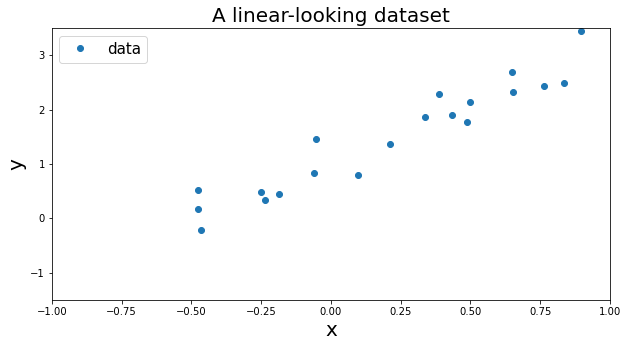

In [31]:
'generate and plot a toy dataset'
m = 20 # number of points
x = -1 + 2*np.random.rand(m) # m random points over the interval [-1,1]
y = 2*x+1+0.25*np.random.randn(m) # y = 2x+1 + random noise
plt.figure(figsize=(10,5)) 
plt.plot(x,y,'o', label='data')
plt.xlim([-1,1])
plt.ylim([-1.5,3.5])
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.title('A linear-looking dataset',fontsize=20)
plt.legend(fontsize=15, loc='upper left')

In [56]:
# feature matrix
m = len(x)
X = np.ones((m,2))
X[:,1] = x

# grid
ms = np.linspace(-7, 10, 500)
bs = np.linspace(-7, 10, 500)
Ms, Bs = np.meshgrid(ms, bs)

# evaluate mse at grid points
params = np.c_[Ms.ravel(), Bs.ravel()].T
mse = np.sum((X@params-y[:,None])**2,axis=0)/m
mse = mse.reshape(Ms.shape)


theta = np.array([-4,-6]) # initial parameters 
lr = 0.01 # learning rate
epochs = 100 # number of iterations

thetas = np.empty((epochs+1,2))
thetas[0] = theta


for i in range(epochs):
    theta = theta - lr * (X.T).dot(X.dot(theta)-y)
    thetas[i+1] = theta
theta

array([1.08517819, 1.97121526])

MovieWriter ffmpeg unavailable; using Pillow instead.


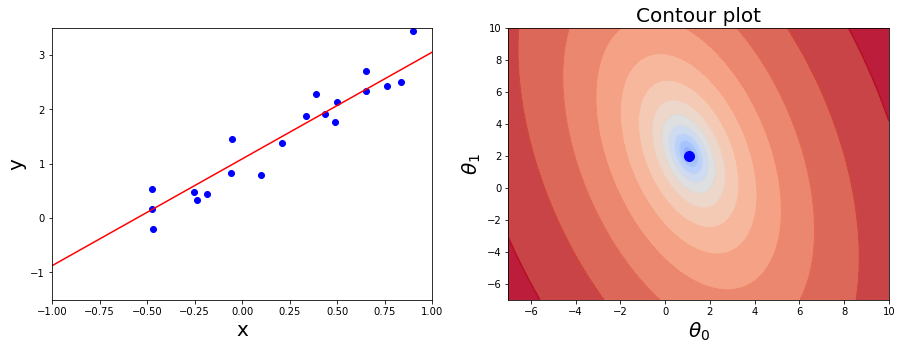

In [59]:
fig, (ax1, ax0) = plt.subplots(1, 2, figsize=(15,5))

# contour plot
levels = np.logspace(-2,3,20)

# animation
camera = Camera(fig)
x_plot = np.linspace(-1,1,100)[:,None]
X_plot = np.hstack([np.ones((100,1)), x_plot])
for i in range(0,epochs):  
    
    # contour plot
    ax0.set_xlabel(r'$\theta_0$',fontsize=20)
    ax0.set_ylabel(r'$\theta_1$',fontsize=20)
    ax0.contour(Ms,Bs,mse,levels,cmap=cm.coolwarm,norm=my_log_cm)
    ax0.contourf(Ms,Bs,mse,levels,alpha=0.9,cmap=cm.coolwarm,norm=my_log_cm)
    ax0.set_title('Contour plot',fontsize=20)
    ax0.grid()
    
    # parameters
    ax0.plot(thetas[i][0],thetas[i][1],'bo',markersize=10)

    # datapoints
    ax1.plot(x,y,'o',color='blue')
    ax1.set_xlabel('x',fontsize=20)
    ax1.set_ylabel('y',fontsize=20)
    ax1.set_xlim([-1,1])
    ax1.set_ylim([-1.5,3.5])
    ax1.plot(x_plot,X_plot.dot(thetas[i]),'r-')
    camera.snap()

animation = camera.animate()
animation.save('grad_des_anim2.gif')

![](grad_des_anim2.gif)